In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [4]:
import os
print(os.listdir("../vanessatorres/desktop/kickstarter-projects"))

['.DS_Store', '.ipynb_checkpoints', '.Rapp.history', 'ks-projects-201612.csv', 'ks-projects-201801.csv']


In [5]:
df_ks16 = pd.read_csv("../vanessatorres/desktop/kickstarter-projects/ks-projects-201612.csv", encoding='ISO-8859-14')
df_ks16.describe()
df_ks16.head(n=3)

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN


In [6]:
df_ks16.drop(['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1, inplace=True)

In [7]:
cols = df_ks16.columns.tolist()
for entry in np.arange(0,len(cols),1):
    cols[entry] = cols[entry].rstrip()
df_ks16.columns = cols
df_ks16.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged'],
      dtype='object')

In [8]:
df_ks16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
ID               323750 non-null int64
name             323748 non-null object
category         323745 non-null object
main_category    323750 non-null object
currency         323750 non-null object
deadline         323750 non-null object
goal             323750 non-null object
launched         323750 non-null object
pledged          323750 non-null object
state            323750 non-null object
backers          323750 non-null object
country          323750 non-null object
usd pledged      319960 non-null object
dtypes: int64(1), object(12)
memory usage: 32.1+ MB


In [9]:
df_ks16[['goal', 'pledged', 'usd pledged', 'backers']] = df_ks16[['goal', 'pledged', 'usd pledged', 'backers']].apply(pd.to_numeric, errors='coerce')
df_ks16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 13 columns):
ID               323750 non-null int64
name             323748 non-null object
category         323745 non-null object
main_category    323750 non-null object
currency         323750 non-null object
deadline         323750 non-null object
goal             323118 non-null float64
launched         323750 non-null object
pledged          323126 non-null float64
state            323750 non-null object
backers          323127 non-null float64
country          323750 non-null object
usd pledged      319337 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 32.1+ MB


In [13]:
df_ks16['state'].value_counts() < 100
acc_states = ['failed', 'successful', 'live', 'undefined', 'suspended']

In [14]:
acc_df_ks16 =df_ks16[df_ks16['state'].isin(acc_states)]

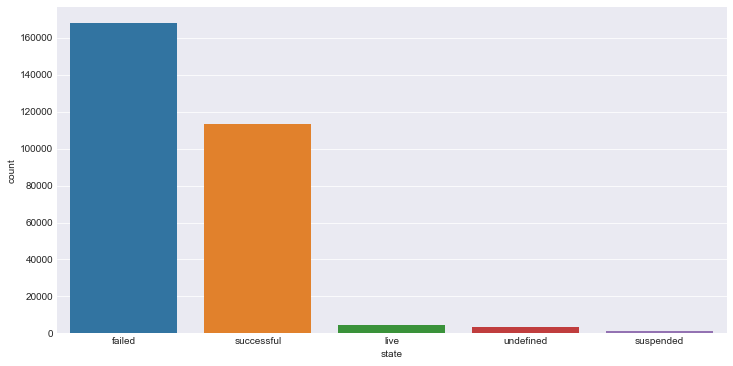

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x='state', data=acc_df_ks16)

<function matplotlib.pyplot.tight_layout>

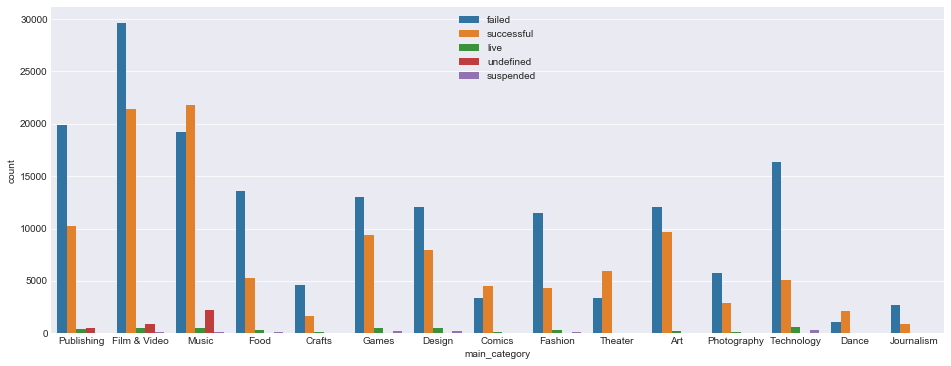

In [17]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=acc_df_ks16, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

<function matplotlib.pyplot.tight_layout>

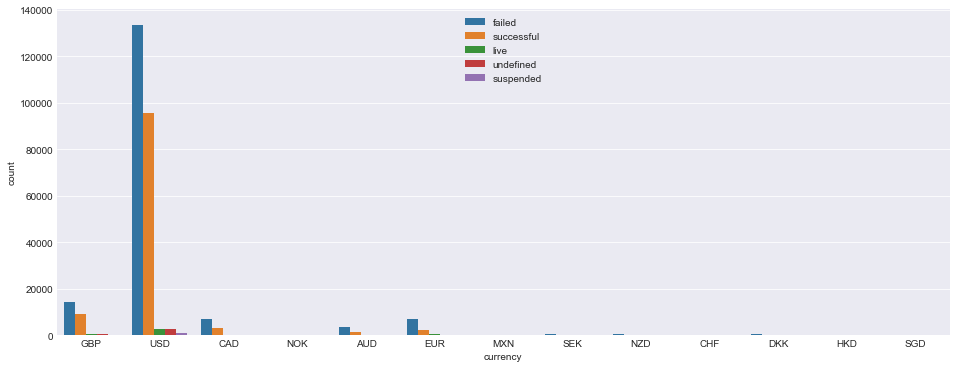

In [18]:
plt.figure(figsize=(16,6))
sns.countplot(x='currency', data=acc_df_ks16, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

In [30]:
df_successfail = acc_df_ks16[(acc_df_ks16['state'] == 'failed') |(acc_df_ks16['state'] == 'successful')]

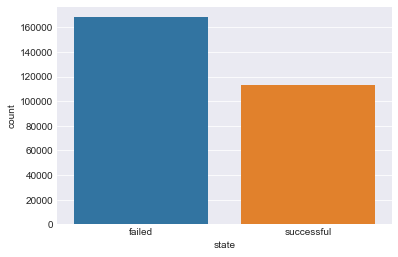

In [31]:
sns.countplot(x='state', data=df_successfail)

In [32]:
df_successfail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281302 entries, 0 to 323749
Data columns (total 13 columns):
ID               281302 non-null int64
name             281301 non-null object
category         281302 non-null object
main_category    281302 non-null object
currency         281302 non-null object
deadline         281302 non-null object
goal             281302 non-null float64
launched         281302 non-null object
pledged          281302 non-null float64
state            281302 non-null object
backers          281302 non-null float64
country          281302 non-null object
usd pledged      281092 non-null float64
dtypes: float64(4), int64(1), object(8)
memory usage: 40.0+ MB


In [33]:
df_successfail[['deadline', 'launched']] = df_successfail[['deadline', 'launched']].apply(pd.to_datetime, errors='coerce', infer_datetime_format=True)

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [34]:
import datetime
df_successfail['length'] = df_successfail['deadline'] - df_successfail['launched']

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [35]:
def daysfinder(timedelta):
    numdays = timedelta.days
    return numdays

In [36]:
df_successfail['length'] = df_successfail['length'].apply(lambda x: daysfinder(x))

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_successfail.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281302 entries, 0 to 323749
Data columns (total 14 columns):
ID               281302 non-null int64
name             281301 non-null object
category         281302 non-null object
main_category    281302 non-null object
currency         281302 non-null object
deadline         281302 non-null datetime64[ns]
goal             281302 non-null float64
launched         281302 non-null datetime64[ns]
pledged          281302 non-null float64
state            281302 non-null object
backers          281302 non-null float64
country          281302 non-null object
usd pledged      281092 non-null float64
length           281302 non-null int64
dtypes: datetime64[ns](2), float64(4), int64(2), object(6)
memory usage: 42.2+ MB


In [39]:
df_successfail = df_successfail[df_successfail['goal'] < 5000000]

<function matplotlib.pyplot.tight_layout>

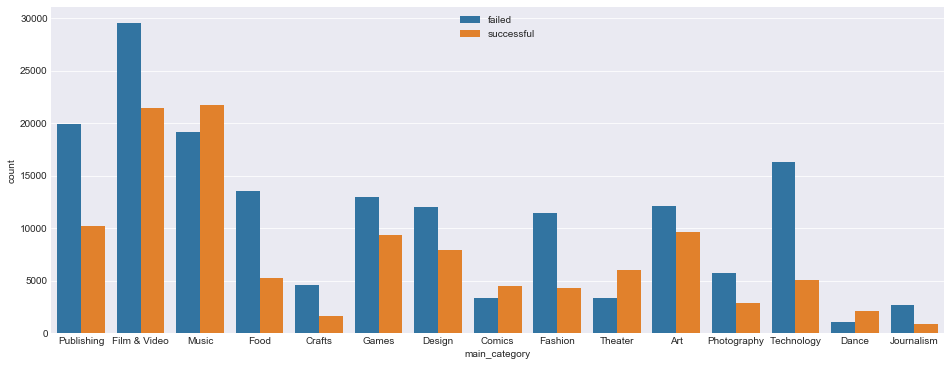

In [41]:
plt.figure(figsize=(16,6))
sns.countplot(x='main_category', data=df_successfail, hue='state')
plt.legend(loc='upper center')
plt.tight_layout

In [42]:
df_dummies16 = pd.get_dummies(data=df_successfail['state'], drop_first=True)

In [43]:
df_successfail['state'] = df_dummies16

In [44]:
df_successfail['main_category'].unique()

array(['Publishing', 'Film & Video', 'Music', 'Food', 'Crafts', 'Games',
       'Design', 'Comics', 'Fashion', 'Theater', 'Art', 'Photography',
       'Technology', 'Dance', 'Journalism'], dtype=object)

In [46]:
category_dict = {
    'Publishing' :1,
    'Film & Video' :2,
    'Music' :3,
    'Food' :4,
    'Crafts' :5,
    'Games' :6,
    'Design' :7,
    'Comics' :8,
    'Fashion' :9,
    'Theater' :10,
    'Art' :11,
    'Photography' :12,
    'Technology' :13,
    'Dance' :14,
    'Journalism' :15
}
df_successfail['main_category'] = df_successfail['main_category'].replace(category_dict)

In [47]:
features = ['main_category', 'goal', 'backers', 'length']
target = ['state']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X = df_successfail[features]
y = df_successfail[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()

In [51]:
regressor.fit(X_train, y_train)

/Users/vanessatorres/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
predictions = regressor.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.89      0.95      0.92     42021
          1       0.92      0.82      0.87     28246

avg / total       0.90      0.90      0.90     70267



In [55]:
print(confusion_matrix(y_test, predictions))

[[40034  1987]
 [ 4974 23272]]
